# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [3]:
import sklearn
sklearn.__version__

'0.23.0'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [4]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


I wanted to get a better idea of the data, so I decided to do some exploration:

In [5]:
# Type of X and Y
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
print("Shape of test_data:", test_data.shape)
print("Shape of test_labels:", test_labels.shape)
print("Shape of dev_data:", dev_data.shape)
print("Shape of dev_labels:", dev_labels.shape)
print("Shape of train_data:", train_data.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of mini_train_data:", mini_train_data.shape)
print("Shape of mini_train_labels:", mini_train_labels.shape)

Shape of test_data: (9000, 784)
Shape of test_labels: (9000,)
Shape of dev_data: (1000, 784)
Shape of dev_labels: (1000,)
Shape of train_data: (60000, 784)
Shape of train_labels: (60000,)
Shape of mini_train_data: (1000, 784)
Shape of mini_train_labels: (1000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

In [7]:
#def P1(num_examples=10):

### STUDENT START ###

def P1(num_examples, data_list, data_labels):
    
    # Get index values of n (specified by user) random examples of each digit. Add these to a list.  
    index_list = []
    for a in range(0,10):
        index_list.append(np.random.choice(np.where(data_labels==str(a))[0], num_examples))

    # Use the index list to compile a list of corresponding digit arrays, reshape them, and add them to another list. 
    reshape_list = []
    for b in index_list:
        for c in b:
            d = np.reshape(data_list[c], (28,28))
            reshape_list.append([c,d])
    
    # Output the image grid.
    plt.figure(figsize=(15,15))
    for e in range(len(reshape_list)):
        plt.subplot(10,num_examples, e+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(reshape_list[e][1], cmap=plt.cm.binary)
        plt.xlabel(data_labels[reshape_list[e][0]])
    plt.show()
    return 

### STUDENT END ###

# This function can work with any of the corresponding data : label datasets that are provided, and n images (spec'd by user).

# Format is P1(Desired number of each digit user wants to see, image dataset, label dataset)

#P1(10, train_data, train_labels)

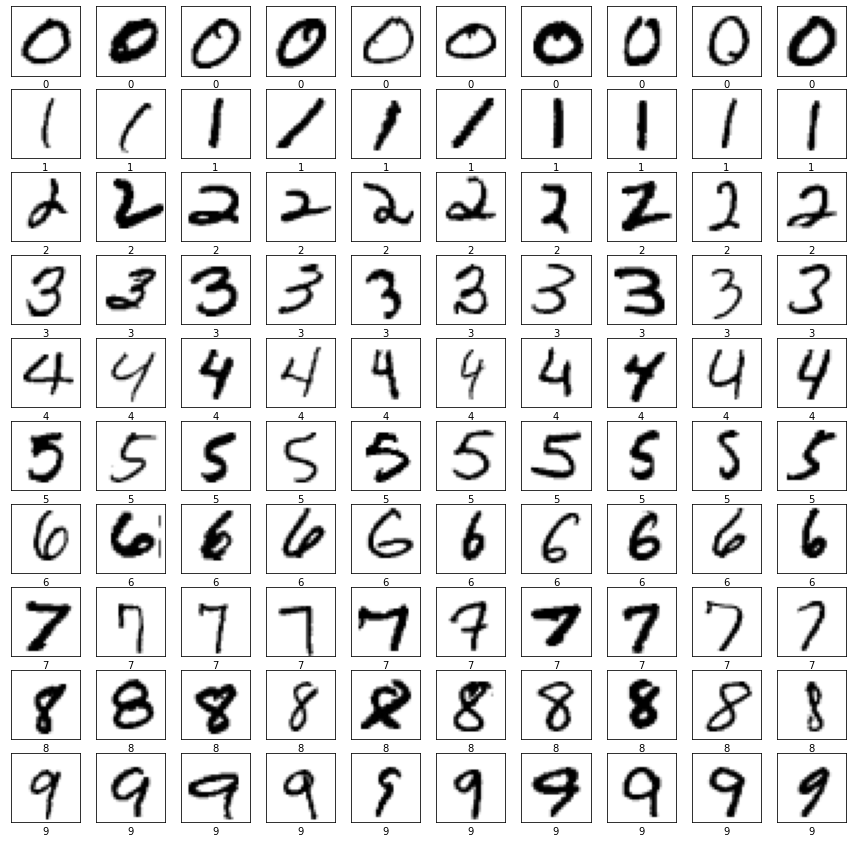

In [8]:
P1(10, train_data, train_labels)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [9]:
#def P2(k_values):

### STUDENT START ###

def P2(values):
    for y in values:
        z = KNeighborsClassifier(n_neighbors = y)
        z.fit(mini_train_data, mini_train_labels)
        z_pred = z.predict(dev_data)
        if y == 1: 
            z_report_1 = sklearn.metrics.classification_report(dev_labels, z_pred)
            print("Classification Report for K =", y, "Nearest Neighbors:")
            print(z_report_1)
        else:
            z_report = sklearn.metrics.classification_report(dev_labels, z_pred, output_dict=True)
            print("Accuracy for K =", y, "Nearest Neighbors:", z_report['accuracy'])

### STUDENT END ###

k_values = [1,3,5,7,9]

In [10]:
P2(k_values)

Classification Report for K = 1 Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Accuracy for K = 3 Nearest Neighbors: 0.876
Accuracy for K = 5 Nearest Neighbors: 0.882
Accuracy for K = 7 Nearest Neighbors: 0.877
Accuracy for K = 9 Nearest Neighbors: 0.875


#### Answer:

Judging by the f1-score, which is the harmonic mean of precision and recall, it appears that with K=1, the KNN model has the hardest time recognizing the digit '8' as reflected by a f1-score of 0.80 which is the lowest for all digits. 

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [11]:
#def P3(train_sizes, accuracies):

### STUDENT START ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
training_times = []
prediction_times = []

def P3(train_sizes, accuracies, training_times, prediction_times):
    for size in train_sizes:
        mod_train_data = train_data[0:size]
        mod_train_labels = train_labels[0:size]
        a = KNeighborsClassifier(n_neighbors = 1)
        train_time_start = time.time()
        a.fit(mod_train_data, mod_train_labels)
        train_time_end = time.time()
        pred_time_start = time.time()
        a_pred = a.predict(dev_data)
        pred_time_end = time.time()
        a_report = sklearn.metrics.classification_report(dev_labels, a_pred, output_dict=True)
        accuracies.append(a_report['accuracy'])
        training_times.append(train_time_end-train_time_start)
        prediction_times.append(pred_time_end-pred_time_start)
        print("K = 1 Nearest Neighbors and", size, "training examples")
        print("Accuracy: ", a_report['accuracy'])
        print("Training time: ", round((train_time_end - train_time_start), 4), "seconds")
        print("Prediction time: ", round((pred_time_end - pred_time_start), 4), "seconds")
        print("---------------------------------------------------------------------")
    
    # Make a chart showing accuracy, training, prediction time
    fig, ax1 = plt.subplots(figsize=(7,7))   
    color = 'tab:red'
    ax1.set_title("Accuracy and Prediction Time for K=1")
    ax1.set_xlabel('Number of Training Examples')
    ax1.set_ylabel('Accuracy')
    ax1.plot(train_sizes, accuracies, marker = 'o', color =color, label = "Accuracy")

    color = 'tab:blue'
    ax2 = ax1.twinx()
    ax2.set_ylabel('Time (seconds)')
    ax2.plot(train_sizes, prediction_times, marker = '^', color=color, label = "Prediction Times")
    ax2.plot(train_sizes, training_times, marker = 'v', color = 'green', label = "Training Times")
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.05),
              fancybox=True, shadow=True, ncol=3)
    return

### STUDENT END ###

K = 1 Nearest Neighbors and 100 training examples
Accuracy:  0.702
Training time:  0.0033 seconds
Prediction time:  0.173 seconds
---------------------------------------------------------------------
K = 1 Nearest Neighbors and 200 training examples
Accuracy:  0.791
Training time:  0.0059 seconds
Prediction time:  0.3189 seconds
---------------------------------------------------------------------
K = 1 Nearest Neighbors and 400 training examples
Accuracy:  0.811
Training time:  0.015 seconds
Prediction time:  0.6181 seconds
---------------------------------------------------------------------
K = 1 Nearest Neighbors and 800 training examples
Accuracy:  0.866
Training time:  0.0357 seconds
Prediction time:  1.2212 seconds
---------------------------------------------------------------------
K = 1 Nearest Neighbors and 1600 training examples
Accuracy:  0.905
Training time:  0.0898 seconds
Prediction time:  2.4709 seconds
------------------------------------------------------------------

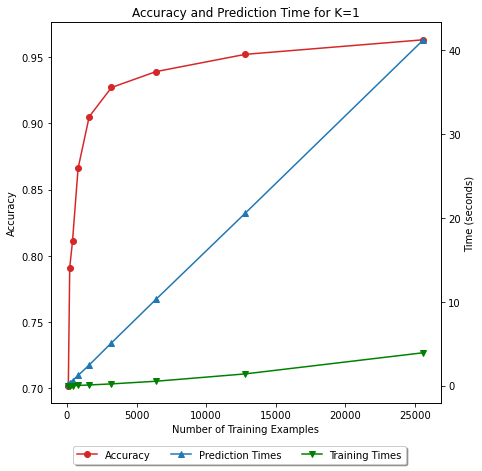

In [12]:
P3(train_sizes, accuracies, training_times, prediction_times)

### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

In [13]:
# Since R2 has to be calculated a number of times, I made a simple function
def R2(y_pred, y_act):
    # Calculate residual sum of squares
    rss_list = []
    for o,p in np.nditer([y_pred, y_act]):
        rss_list.append((o-p)**2)
    
    # Calculate total sum of squares
    tss_list = []
    q = float(sum(y_act)/len(y_act))
    for r in np.nditer(y_act):
        tss_list.append((r-q)**2)
        
    # Calculate R^2
    R2 = 1-(sum(rss_list)/sum(tss_list))
    
    return R2

In [14]:
#def P4():

### STUDENT START ###

def P4(train_sizes, accuracies, prediction_list):
    
    # Fit untransformed model
    train_sizes_r = np.array(train_sizes).reshape(len(train_sizes),1)
    accuracies_r = np.array(accuracies).reshape(len(accuracies),1)
    reg = LinearRegression().fit(train_sizes_r, accuracies_r) 
    predict = reg.predict(train_sizes_r)
    prediction_list_r = np.array(prediction_list).reshape(len(prediction_list),1)
    predict1 = reg.predict(prediction_list_r)    
    
    # Untransformed: Display graph showing actual vs. predicted values:
    
    # Transform variables
    log_x = np.log(train_sizes_r)
    log_y = np.log((accuracies_r)/(1-accuracies_r))
    log_train = np.log(prediction_list_r)
    
    # Train models using iterations of accuracies
    # 1. Using log(x), y, and transforming prediction values before input
    reg2 = LinearRegression().fit(log_x, accuracies_r)
    train2 = reg2.predict(log_x)
    predict2 = reg2.predict(log_train)
    # 2. Using x, logit(y) and transforming output values
    reg3 = LinearRegression().fit(train_sizes_r, log_y)
    train3 = reg3.predict(train_sizes_r)
    predict3 = reg3.predict(prediction_list_r)
    untransform = np.exp(predict3)/(np.exp(predict3)+1)
    # 3. Using log(x), logit(y)
    reg4 = LinearRegression().fit(log_x, log_y)
    train4 = reg4.predict(log_x)
    predict4 = reg4.predict(log_train)
    untransform2 = np.exp(predict4)/(np.exp(predict4)+1)
       
    # Graph, Show R2 and predictions for untransformed model:
    plt.scatter(train_sizes, accuracies, c='orange', label = "Actual Accuracy")
    plt.plot(train_sizes, list(predict), c='blue', label="Predicted Accuracy")
    plt.xlabel("Training Set Size (x)")
    plt.ylabel("Accuracy (y)")
    plt.title("Predicted vs. Actual Accuracy for Non-Transformed Model")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)
    plt.show()
    
    print("--------------------------------------------------------")
    print("Model R^2 Using non-transformed Inputs:", round(R2(predict, accuracies_r),3))
    print("--------------------------------------------------------")   
    print("Predicted accuracy for non-transformed regression model:")
    for s,t in np.nditer([prediction_list_r, predict1]):
        print("Predicted accuracy for", s, "training samples:", round(float(t),3))
    print("--------------------------------------------------------")
    print("NB: Predicted output accuracies are untransformed")
    print("--------------------------------------------------------")
   
    # Graph, Show R2 and predictions for Transformation 1.:
    plt.scatter(list(log_x), list(accuracies_r), c='green', label = "Actual Accuracy")
    plt.plot(list(log_x), list(train2), c='blue', label="Predicted Accuracy")
    plt.xlabel("log(x)")
    plt.ylabel("y")
    plt.title("Predicted vs. Actual Accuracy For Transformed X only")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),fancybox=True, shadow=True, ncol=3)
    plt.show()
    
    print("--------------------------------------------------------")
    print("Model R^2 Using transformed X:", round(R2(train2, accuracies_r),3))
    print("--------------------------------------------------------")
    print("Predicted accuracy for transformed regression model:")
    for gg,hh in np.nditer([prediction_list, list(np.transpose(predict2))]):
        print("Predicted accuracy for", int(gg), "training samples:", round(float(hh),3))
    print("--------------------------------------------------------")
    print("NB: Predicted output accuracies are untransformed")
    print("--------------------------------------------------------")
    
    # Graph, Show R2 and predictions for Transformation 2.:
    plt.scatter(list(train_sizes_r), list(log_y), c='yellow', label = "Actual Accuracy")
    plt.plot(list(train_sizes_r), list(train3), c='blue', label="Predicted Accuracy")
    plt.xlabel("x")
    plt.ylabel("logit(y)")
    plt.title("Predicted vs. Actual Accuracy For Transformed Y only")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),fancybox=True, shadow=True, ncol=3)
    plt.show()
    
    print("--------------------------------------------------------")
    print("Model R^2 Using transformed Y:", round(R2(train3, log_y),3))
    print("--------------------------------------------------------")
    print("Predicted accuracy for transformed regression model:")
    for gg,hh in np.nditer([prediction_list, list(np.transpose(untransform))]):
        print("Predicted accuracy for", int(gg), "training samples:", round(float(hh),3))
    print("--------------------------------------------------------")
    print("NB: Predicted output accuracies are transformed.")
    print("--------------------------------------------------------")
    
    
    # Graph, Show R2 and predictions for Transformation 3.:
    plt.scatter(list(log_x), list(log_y), c='red', label = "Actual Accuracy")
    plt.plot(list(log_x), list(train4), c='blue', label="Predicted Accuracy")
    plt.xlabel("log(x)")
    plt.ylabel("logit(y)")
    plt.title("Predicted vs. Actual Accuracy For Transformed X and Y")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),fancybox=True, shadow=True, ncol=3)
    plt.show()
    
    print("--------------------------------------------------------")
    print("Model R^2 Using transformed X:", round(R2(train4, log_y),3))
    print("--------------------------------------------------------")
    print("Predicted accuracy for transformed regression model:")
    for gg,hh in np.nditer([prediction_list, list(np.transpose(untransform2))]):
        print("Predicted accuracy for", int(gg), "training samples:", round(float(hh),3))
    print("--------------------------------------------------------")
    print("NB: Predicted output accuracies are transformed.")
    print("--------------------------------------------------------")    
    return
    
# ### STUDENT END ###

# #P4()

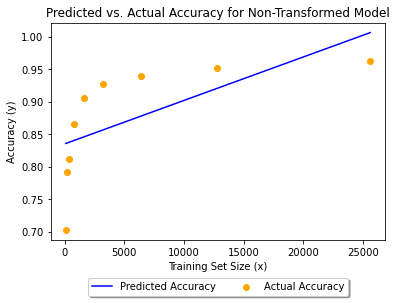

--------------------------------------------------------
Model R^2 Using non-transformed Inputs: 0.418
--------------------------------------------------------
Predicted accuracy for non-transformed regression model:
Predicted accuracy for 60000 training samples: 1.236
Predicted accuracy for 120000 training samples: 1.637
Predicted accuracy for 1000000 training samples: 7.522
--------------------------------------------------------
NB: Predicted output accuracies are untransformed
--------------------------------------------------------


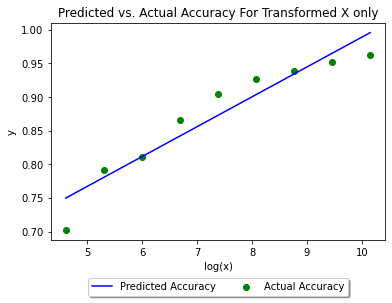

--------------------------------------------------------
Model R^2 Using transformed X: 0.907
--------------------------------------------------------
Predicted accuracy for transformed regression model:
Predicted accuracy for 60000 training samples: 1.034
Predicted accuracy for 120000 training samples: 1.064
Predicted accuracy for 1000000 training samples: 1.158
--------------------------------------------------------
NB: Predicted output accuracies are untransformed
--------------------------------------------------------


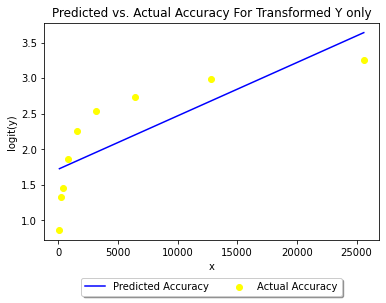

--------------------------------------------------------
Model R^2 Using transformed Y: 0.616
--------------------------------------------------------
Predicted accuracy for transformed regression model:
Predicted accuracy for 60000 training samples: 0.998
Predicted accuracy for 120000 training samples: 1.0
Predicted accuracy for 1000000 training samples: 1.0
--------------------------------------------------------
NB: Predicted output accuracies are transformed.
--------------------------------------------------------


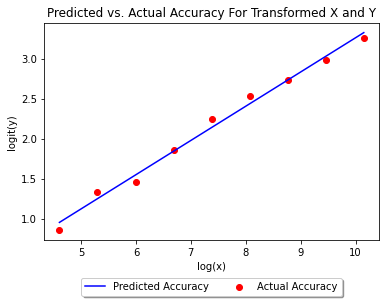

--------------------------------------------------------
Model R^2 Using transformed X: 0.99
--------------------------------------------------------
Predicted accuracy for transformed regression model:
Predicted accuracy for 60000 training samples: 0.976
Predicted accuracy for 120000 training samples: 0.982
Predicted accuracy for 1000000 training samples: 0.993
--------------------------------------------------------
NB: Predicted output accuracies are transformed.
--------------------------------------------------------


In [15]:
prediction_list = [60000,120000,1000000]
P4(train_sizes, accuracies, prediction_list)

ANSWER: 

As the raw accuracies from the KNN training can never exceed 1, using a linear regression model to predict these accuracies for x-values in the space outside of what the model was trained on will produce unrealistic accuracy predictions > 1. The poor fit of this model is exemplified by an R^2 of 0.42. 

Transforming x but not y yields much better performance in terms of R^2, but predicted accuracies are still unrealistic. 
Transforming y but not x yields worse performance than transforming x alone (in terms of R^2), but better performance than not transforming any of the variables. Transforming predicted accuracies back into non-log domain yields unrealistic accuracies that are ~1 (given rounding), which in reality is impossible and would indicate overfitting.

Subsequently, transforming the x-variable by taking its log, and using a logit transform for the y-variable, linearizes the data, permitting a very accurate OLS line to be fit (R^2 > 0.99). This means that it is able to more reliably predict outputs for y-values it was not trained on, as the y-predicteds have very little deviation from the y-actuals. Nevertheless, the inverse logit of the predicted y values must be taken to get a real accuracy estimate. These however seem to make sense, are all <1 and show that the model improves with more training examples, with the accuracy asymptotically approaching 1. 

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

In [16]:
#def P5():

### STUDENT START ###
def P5(train_data, train_labels, test_data, test_labels):
    # Train model
    knn_ = KNeighborsClassifier(n_neighbors = 1)
    knn_.fit(train_data, train_labels)
    predicteds = knn_.predict(test_data)
    conf = confusion_matrix(test_labels, predicteds)
    
    # Compile a list of misidentified digits and their index positions.
    label_list = test_labels.astype(int).tolist()
    predicted_list = predicteds.astype(int).tolist()

    non_match = []
    
    for index, value in enumerate(label_list):
        if value not in [predicted_list[index]]:
            non_match.append({index:[value,predicted_list[index]]})
    
    # Print confusion matrix 
    print(" "*20 + "Confusion Matrix")
    print("Values on left are actual labels, across the top are predicted\n\n")
    print("   |", end="")
    for predicted in range(conf.shape[0]):
        print(f"{predicted:>4d}|",end='')    
    print("")
    print("    "+"-"*50)
    for predicted in range(conf.shape[0]):
        for true in range(conf.shape[1]):
            if true == 0:
                print(f"{predicted:>3d}|",end=' ')    
            print(f"{conf[predicted, true]:>3d}|",end=' ')
        print("")
        
    return non_match

### STUDENT END ###

In [17]:
# Show examples of incorrectly predicted 4's and 9's

def print_incorrect(incorrect_list):
    
    for item in incorrect_list:
        for key, value in item.items():
            if value[0]==4 and value[1]==9:
                plt.figure(figsize=(2,2))
                plt.title("4 incorrectly predicted as 9")
                plt.xticks([])
                plt.yticks([])
                plt.imshow(np.reshape(dev_data[key], (28,28)), cmap=plt.cm.binary)
                plt.show()
            else:
                continue
    return

                    Confusion Matrix
Values on left are actual labels, across the top are predicted


   |   0|   1|   2|   3|   4|   5|   6|   7|   8|   9|
    --------------------------------------------------
  0| 101|   0|   1|   0|   0|   0|   1|   1|   2|   0| 
  1|   0| 116|   1|   0|   0|   0|   0|   0|   1|   0| 
  2|   1|   4|  84|   2|   2|   0|   2|   4|   6|   1| 
  3|   0|   2|   0|  84|   0|   6|   0|   2|   3|   0| 
  4|   0|   0|   1|   0|  78|   0|   0|   2|   0|  11| 
  5|   2|   0|   0|   1|   1|  77|   5|   0|   2|   0| 
  6|   1|   2|   1|   0|   1|   2|  94|   0|   1|   0| 
  7|   0|   1|   1|   0|   0|   0|   0|  96|   0|   4| 
  8|   1|   5|   4|   3|   1|   3|   0|   1|  72|   4| 
  9|   0|   1|   0|   0|   3|   2|   0|   7|   0|  82| 


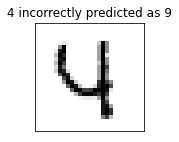

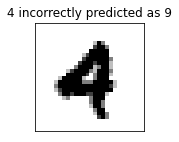

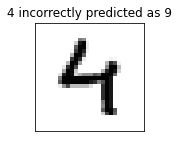

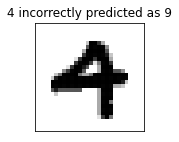

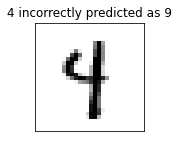

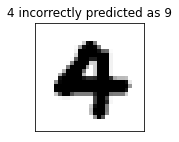

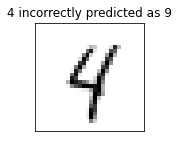

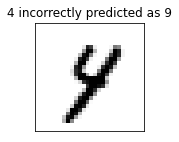

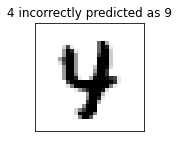

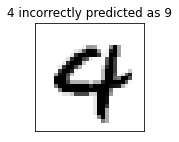

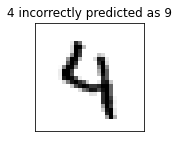

In [18]:
print_incorrect(P5(mini_train_data, mini_train_labels, dev_data, dev_labels))

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [19]:
#def P6():
    
### STUDENT START ###

# Blurring function

def P6(dataset, weight):
    output_dataset = np.zeros(dataset.shape)
    for image in range(dataset.shape[0]):
        old = dataset[image].reshape(28,28)
        new = np.zeros((28,28))
        for row in range(28):
            for column in range(28):
                new[row,column] = old[row,column] + np.sum(old[row-1:row+2, column-1:column+2])/weight
        output_dataset[image] = new.reshape(784,)  
    return output_dataset


In [20]:
mini_train_blurred = P6(mini_train_data, 9)
dev_data_blurred = P6(dev_data, 9)

# K=1 nearest neighbor model
blur_k = KNeighborsClassifier(n_neighbors = 1)

# Unfiltered training and testing data
blur_k_fit1 = blur_k.fit(mini_train_data, mini_train_labels)
blur_k_predict1 = blur_k_fit1.predict(dev_data)
accuracy1 = sklearn.metrics.classification_report(dev_labels, blur_k_predict1, output_dict=True)
a_1 = accuracy1['accuracy']

# Filtered training, unfiltered testing data
blur_k_fit2 = blur_k.fit(mini_train_blurred, mini_train_labels)
blur_k_predict2 = blur_k_fit2.predict(dev_data)
accuracy2 = sklearn.metrics.classification_report(dev_labels, blur_k_predict2, output_dict=True)
a_2 = accuracy2['accuracy']

# Unfiltered training, filtered testing data
blur_k_predict3 = blur_k_fit1.predict(dev_data_blurred)
accuracy3 = sklearn.metrics.classification_report(dev_labels, blur_k_predict3, output_dict=True)
a_3 = accuracy3['accuracy']

# Filtered training and testing data
blur_k_predict4 = blur_k_fit2.predict(dev_data_blurred)
accuracy4 = sklearn.metrics.classification_report(dev_labels, blur_k_predict4, output_dict=True)
a_4 = accuracy4['accuracy']


print("Performance for K=1 Nearest Neighbors and Filtered/Unfiltered Data")
print("-----------------------------------------------------------------------------")
print("Accuracy using a unfiltered training and testing data: {}".format(a_1))
print("-----------------------------------------------------------------------------")
print("Accuracy using a filtered training and unfiltered testing data: {}".format(a_2))
print("-----------------------------------------------------------------------------")
print("Accuracy using a unfiltered training and filtered testing data: {}".format(a_3))
print("-----------------------------------------------------------------------------")
print("Accuracy using a filtered training and testing data: {}".format(a_3))

Performance for K=1 Nearest Neighbors and Filtered/Unfiltered Data
-----------------------------------------------------------------------------
Accuracy using a unfiltered training and testing data: 0.884
-----------------------------------------------------------------------------
Accuracy using a filtered training and unfiltered testing data: 0.669
-----------------------------------------------------------------------------
Accuracy using a unfiltered training and filtered testing data: 0.898
-----------------------------------------------------------------------------
Accuracy using a filtered training and testing data: 0.898


### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [21]:
# Decided to make my own function to binarize array. This creates either black/white or grayscale array, depending on which version is chosen

def binarize(dataset, version):
    
    if version == 1:
        
        binarized_dataset = np.zeros(dataset.shape)

        for image in range(dataset.shape[0]):
            new_image = np.zeros(784,)
            for pixel in range(dataset.shape[1]):
                if dataset[image][pixel] > 0.1:
                    new_image[pixel] = 1
                elif dataset[image][pixel] <= 0.1:
                    new_image[pixel] = 0

            binarized_dataset[image] = new_image

        return binarized_dataset
    
    elif version == 2:
        
        binarized_dataset = np.zeros(dataset.shape)
        
        for image in range(dataset.shape[0]):
            new_image = np.zeros(784,)
            for pixel in range(dataset.shape[1]):
                if dataset[image][pixel] >= 0.9:
                    new_image[pixel] = 2
                elif dataset[image][pixel] <= 0.1:
                    new_image[pixel] = 0
                else:
                    new_image[pixel] = 1
                    
            binarized_dataset[image] = new_image
        
        return binarized_dataset
                
# Combine both models into 1 function, specified by version call, which either performs Bernoulli NB or Multinomial NB depending on which version is called
        
def nb(train_dataset, train_labels, test_dataset, test_labels, version):
    
    if version == 1:
        
        BNBfit = BernoulliNB()
        BNBfit.fit(train_dataset, train_labels)
        BNBpredict = BNBfit.predict(test_dataset)
        accuracy = sklearn.metrics.classification_report(test_labels, BNBpredict, output_dict=True)
        
        print("The accuracy of the Bernoulli NB model on black/white dataset is: {}".format(accuracy['accuracy']))

        return 
    
    elif version == 2:
        
        MNBfit = MultinomialNB()
        MNBfit.fit(train_dataset, train_labels)
        MNBpredict = MNBfit.predict(test_dataset)
        accuracy = sklearn.metrics.classification_report(test_labels, MNBpredict, output_dict=True)
        
        print("The accuracy of the Multinomial NB model on grayscale dataset is: {}".format(accuracy['accuracy']))
        
        return

### STUDENT END ###

In [22]:
nb(binarize(mini_train_data,1), mini_train_labels, binarize(dev_data,1), dev_labels, 1)

The accuracy of the Bernoulli NB model on black/white dataset is: 0.814


In [23]:
nb(binarize(mini_train_data,2), mini_train_labels, binarize(dev_data,2), dev_labels, 2)

The accuracy of the Multinomial NB model on grayscale dataset is: 0.807


ANSWER:

It seems that there is little change between the multinomial and binomial models. There is a chance that the multinomial model is overfitting on the training dataset, hence why there is little improvement between models. 

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [24]:
#def P8(alphas):

### STUDENT START ###

def P8(alphas, train_data, train_labels):
    
    BNB = BernoulliNB()
    grid_search = sklearn.model_selection.GridSearchCV(BNB, alphas, cv=5, scoring='accuracy')
    grid_search.fit(train_data, train_labels)
    results = grid_search.cv_results_
    
    print("Performance Using GridSearchCV and various LaPlace Smoothing Parameters")
    print("---------------------------------------------------")
    for m in range(len(results['param_alpha'])):
        print("For alpha of {}, mean test score was {}".format(results['param_alpha'][m], round(results['mean_test_score'][m],3)))
        print("---------------------------------------------------")
    
    print("Top Scores")    
    print("---------------------------------------------------")   
    print("Best alpha:", grid_search.best_params_['alpha'])
    print("---------------------------------------------------")
    print("Best performance:", grid_search.best_score_)
    
    plt.plot(np.log([float(x) for x in results['param_alpha']]), results['mean_test_score'], c='purple', label="Mean Test Score")
    plt.xlabel("ln(Alpha)")
    plt.ylabel("Mean Test Score")
    plt.title("Mean Test Score for Various Alphas")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),fancybox=True, shadow=True, ncol=3)
    plt.show()
    
    return

### STUDENT END ###

Performance Using GridSearchCV and various LaPlace Smoothing Parameters
---------------------------------------------------
For alpha of 1e-10, mean test score was 0.814
---------------------------------------------------
For alpha of 0.0001, mean test score was 0.819
---------------------------------------------------
For alpha of 0.001, mean test score was 0.825
---------------------------------------------------
For alpha of 0.01, mean test score was 0.822
---------------------------------------------------
For alpha of 0.1, mean test score was 0.818
---------------------------------------------------
For alpha of 0.5, mean test score was 0.813
---------------------------------------------------
For alpha of 1.0, mean test score was 0.809
---------------------------------------------------
For alpha of 2.0, mean test score was 0.805
---------------------------------------------------
For alpha of 10.0, mean test score was 0.783
---------------------------------------------------
Top

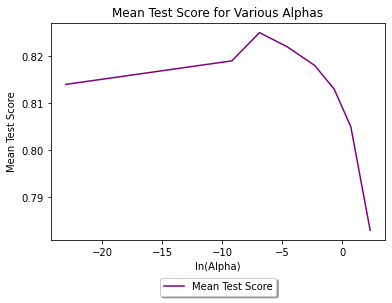

In [25]:
alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

P8(alphas, mini_train_data, mini_train_labels)

ANSWER:

The best performance came at alpha of 0.001, with a mean test score of 0.825. The accuracy increases from 10-0.001, then begins to decrease, as demonstrated in the graph. 

For naive Bayes classifiers, if a value that is not in the training set is encountered (for example if it is rare), its probability of being a particular class will be 0. Alpha is a hyperparameter that permits rare values to not have a value of 0 and thus underfitting the data. Therefore, when the value of alpha decreases past a certain threshold, it causes the model to start underfitting.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [26]:
def P9(train_data, train_labels, test_data, test_labels):
    GNB = sklearn.naive_bayes.GaussianNB()
    GNBfit = GNB.fit(train_data, train_labels)
    GNBpredict = GNB.predict(test_data)
    GNBperformance = sklearn.metrics.classification_report(test_labels, GNBpredict, output_dict=True)
    
    print("Model accuracy for Gaussian Naive Bayes model alone: {}".format(GNBperformance['accuracy']))
    
    return 

def optimize(train_data, train_labels, params):
    optimize = sklearn.model_selection.GridSearchCV(GaussianNB(), params, cv=None, scoring='accuracy', iid=False)
    optimize.fit(train_data, train_labels)
    results = optimize.cv_results_
    
    print("Performance Using GridSearchCV and various LaPlace Smoothing Parameters")
    print("---------------------------------------------------")
    for m in range(len(results['param_var_smoothing'])):
        print("For sigma of {}, mean test score was {}".format(results['param_var_smoothing'][m], round(results['mean_test_score'][m],3)))
        print("---------------------------------------------------")
    
    print("Top Scores")    
    print("---------------------------------------------------")   
    print("Best sigma:", optimize.best_params_['var_smoothing'])
    print("---------------------------------------------------")
    print("Best performance:", optimize.best_score_)
    
    plt.plot(results['param_var_smoothing'], results['mean_test_score'], c='darkgreen', label="Mean Test Score")
    plt.xlabel("Sigma")
    plt.ylabel("Mean Test Score")
    plt.title("Mean Test Score for Various Sigmas")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),fancybox=True, shadow=True, ncol=3)
    plt.show()
    
    return 

In [27]:
P9(mini_train_data, mini_train_labels, dev_data, dev_labels)

Model accuracy for Gaussian Naive Bayes model alone: 0.593


Performance Using GridSearchCV and various LaPlace Smoothing Parameters
---------------------------------------------------
For sigma of 0.01, mean test score was 0.771
---------------------------------------------------
For sigma of 0.02, mean test score was 0.786
---------------------------------------------------
For sigma of 0.03, mean test score was 0.791
---------------------------------------------------
For sigma of 0.04, mean test score was 0.795
---------------------------------------------------
For sigma of 0.05, mean test score was 0.793
---------------------------------------------------
For sigma of 0.06, mean test score was 0.793
---------------------------------------------------
For sigma of 0.07, mean test score was 0.79
---------------------------------------------------
For sigma of 0.08, mean test score was 0.789
---------------------------------------------------
For sigma of 0.09, mean test score was 0.785
---------------------------------------------------
Top 

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


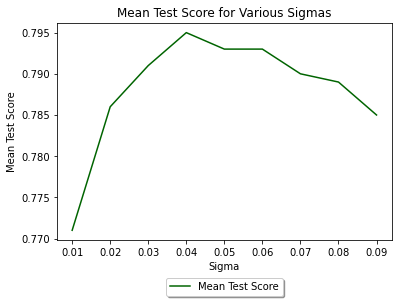

In [28]:
smoothing_values = {'var_smoothing': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]}

optimize(mini_train_data, mini_train_labels, smoothing_values)

As we can see here, the optimal sigma value is 0.04, giving model performance of 0.795. We can alter our original model subsequently to improve its performance:

In [29]:
def P9_alt(train_data, train_labels, test_data, test_labels):
    GNB = sklearn.naive_bayes.GaussianNB(var_smoothing=0.04)
    GNBfit = GNB.fit(train_data, train_labels)
    GNBpredict = GNB.predict(test_data)
    GNBperformance = sklearn.metrics.classification_report(test_labels, GNBpredict, output_dict=True)
    
    print("Model accuracy for Gaussian Naive Bayes model with sigma of 0.04: {}".format(GNBperformance['accuracy']))
    
    return 

In [30]:
P9_alt(mini_train_data, mini_train_labels, dev_data, dev_labels)

Model accuracy for Gaussian Naive Bayes model with sigma of 0.04: 0.815


ANSWER:

By selecting a sigma value of 0.04, we have increased our model performance to 0.815. 

A Gaussian curve serves as a "low pass" filter, allowing only samples close to its mean to "pass." In the context of Naive Bayes, assuming a Gaussian distribution is essentially giving more weights to the samples closer to the distribution mean. This might or might not be appropriate depending if what you want to predict follows a normal distribution.

The variable var_smoothing adds a user-specified value to the distribution's variance (whose default value is derived from the training data set). This widens/smooths the curve and takes into account samples that are further away from the mean.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

In [31]:
def P10(num_examples, train_data, train_labels):
    BNB = sklearn.naive_bayes.BernoulliNB()
    BNB.fit(train_data, train_labels)
    
    log_prob_grid = BNB.feature_log_prob_
    
    fig,ax = plt.subplots(10, num_examples, figsize=(15,15))
    
    for number in range(10):
        for example in range(num_examples):
            probs = log_prob_grid[number]
            randints = np.random.rand(probs.shape[0])
            new_matrix = np.zeros(probs.shape[0])
            for pixel in range(probs.shape[0]): 
                if randints[pixel] > np.exp(probs[pixel]):
                    new_matrix[pixel] = 1
                else:
                    new_matrix[pixel] = 0
            
            ax[number][example].imshow(new_matrix.reshape(28,28), cmap=plt.cm.gray)
            ax[number][example].axis("off")
            ax[number][example].set_title(number)
    return 


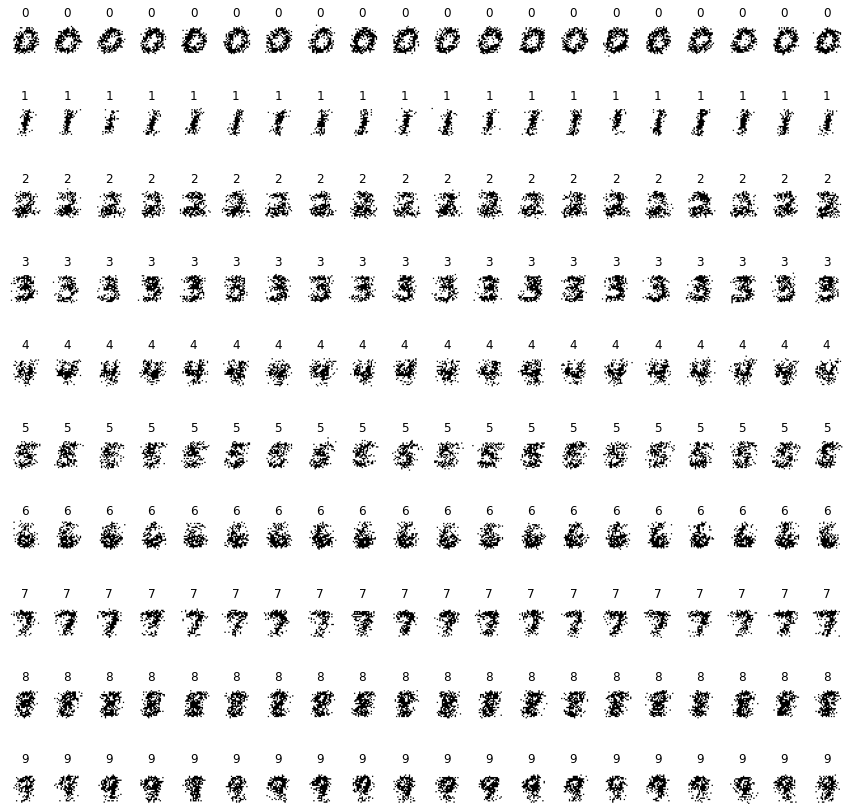

In [32]:
P10(20, train_data, train_labels)

ANSWER:

Though these digits broadly approximate the shape of the real training digits, they are sometimes quite hard to interpret due to a lot of noise around them.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [33]:
def P11(buckets, correct, total, train_data, train_labels, test_data, test_labels):
    BNB = sklearn.naive_bayes.BernoulliNB(alpha = 0.001, binarize=0)
    BNB.fit(train_data, train_labels)
    BNB_predict = BNB.predict_proba(test_data)

    for prediction in range(BNB_predict.shape[0]):
        array = np.array(BNB_predict[prediction][:])
        high_dig = np.argmax(array)
        high_prob = np.max(array)
        for bucket in range(len(buckets)):
            if high_prob <= buckets[bucket]:
                if str(high_dig) == test_labels[prediction]:
                    correct[bucket] += 1
                total[bucket] += 1
                break
    
    for i in range(len(buckets)):
        accuracy = 0.0
        if (total[i] > 0): accuracy = correct[i] / total[i]
        print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

    return 

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total, mini_train_data, mini_train_labels, dev_data, dev_labels)

p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  31    accuracy = 0.355
p(pred) is 0.9000000000000 to 0.9990000000000    total =  67    accuracy = 0.433
p(pred) is 0.9990000000000 to 0.9999900000000    total =  59    accuracy = 0.458
p(pred) is 0.9999900000000 to 0.9999999000000    total =  46    accuracy = 0.652
p(pred) is 0.9999999000000 to 0.9999999990000    total =  62    accuracy = 0.774
p(pred) is 0.9999999990000 to 0.9999999999900    total =  33    accuracy = 0.788
p(pred) is 0.9999999999900 to 0.9999999999999    total =  43    accuracy = 0.791
p(pred) is 0.9999999999999 to 1.0000000000000    total = 659    accuracy = 0.938


ANSWER:
This is not a well calibrated classifier as accuracy is < p(pred) for all buckets. 

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [36]:


def row_sum(dataset):
    new_array = np.zeros((1000,812))
    blank = np.zeros((28,29))
    for number in range(dataset.shape[0]):
        reshaped = dataset[number].reshape(28,28)
        for row in range(reshaped.shape[0]):
            blank[row] = np.append(reshaped[row], sum(reshaped[row]))
            new_array[number] = blank.flatten()
    return new_array[4]


def row_avg(dataset):
    new_array = np.zeros((1000,812))
    blank = np.zeros((28,29))
    for number in range(dataset.shape[0]):
        reshaped = dataset[number].reshape(28,28)
        for row in range(reshaped.shape[0]):
            blank[row] = np.append(reshaped[row], np.mean(reshaped[row]))
            new_array[number] = blank.flatten()
    return new_array


